In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
sns.set_context('notebook')

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Start with some data exploration
Import the files & start exploring them!

In [25]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

print("Train and Test variants shape : ",train_variants_df.shape, test_variants_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [26]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [27]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [28]:
train_text_df['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

Seems like a paper or conference proceeding

## Distributions

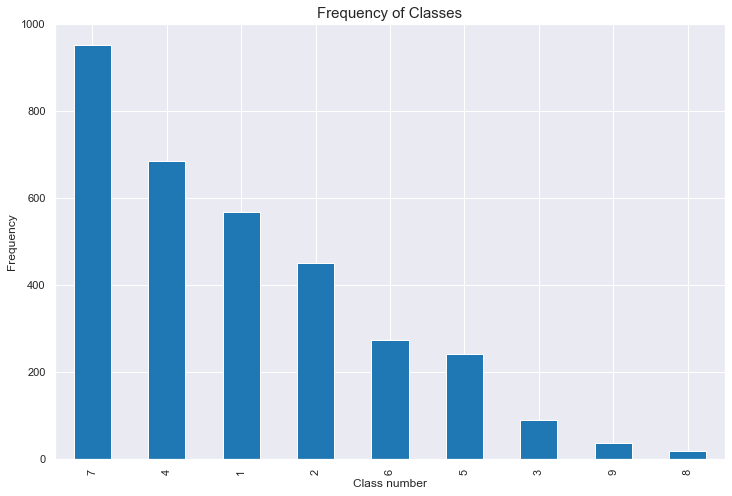

In [29]:
plt.figure(figsize=(12,8))
#sns.countplot(x="Class", data=train_variants_df)
train_variants_df.Class.value_counts().plot(kind='bar')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class number', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

Some classes are much more rare than others

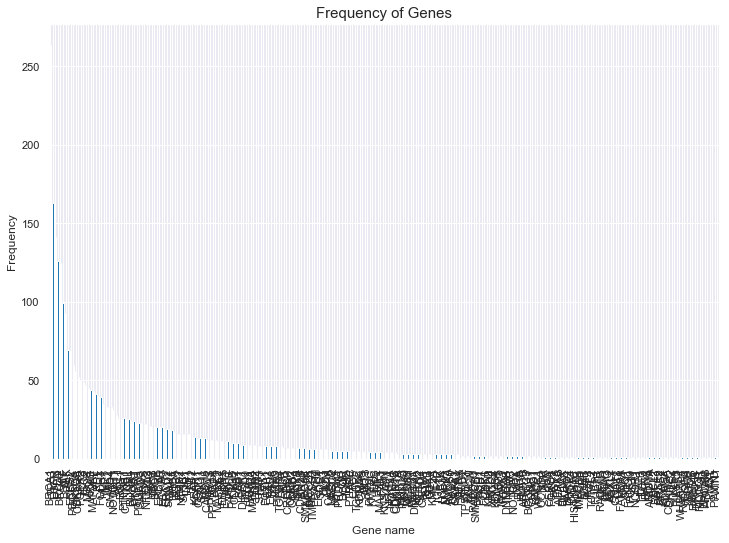

In [30]:
plt.figure(figsize=(12,8))
#sns.countplot(x="Class", data=train_variants_df)
train_variants_df.Gene.value_counts().plot(kind='bar')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Gene name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Genes", fontsize=15)
plt.show()

Seems like some genes are much more prone to mutation than others. Which genes are these?

In [31]:
geneCounts = train_variants_df.Gene.value_counts()
geneCounts.nlargest(20)

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64

Are genes and classes correlated?

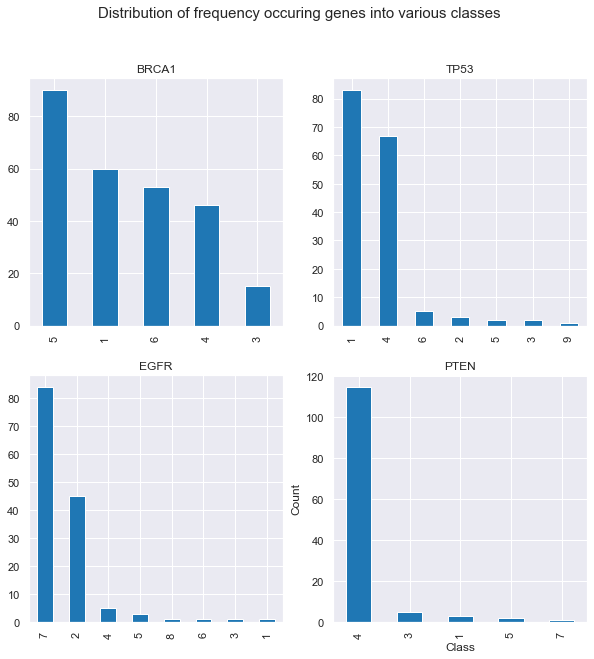

In [32]:
f,axs = plt.subplots(2,2, figsize = (10,10))
f.suptitle("Distribution of frequency occuring genes into various classes", fontsize=15)

train_variants_df.loc[train_variants_df['Gene'] =='BRCA1'].Class.value_counts().plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title('BRCA1')
train_variants_df.loc[train_variants_df['Gene'] =='TP53'].Class.value_counts().plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title('TP53')
train_variants_df.loc[train_variants_df['Gene'] =='EGFR'].Class.value_counts().plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title('EGFR')
train_variants_df.loc[train_variants_df['Gene'] =='PTEN'].Class.value_counts().plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title('PTEN')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

It seems like the gene itself has some predictive power on the class in which it belongs. Now let's look at the variation types.

In [33]:
variationCounts = train_variants_df.Variation.value_counts()
variationCounts.nlargest(20)

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61H                     3
E17K                     3
Q61R                     3
T58I                     3
Q61L                     3
R841K                    2
I31M                     2
K117N                    2
F28L                     2
R170W                    2
C618R                    2
Y64A                     2
V321M                    2
ETV6-NTRK3 Fusion        2
Name: Variation, dtype: int64

Most mutations are protein-swaps. Does variation correlate wtih class?

In [34]:
# replace X123X variation types with "protein swap" and look at distribution of classes for each variation

mutationTypes = {'Truncating Mutations','Deletion','Amplification','Fusions','Overexpression','ProteinSwap'}

# copy the variation column
train_variants_df['Variation_Alt'] = train_variants_df['Variation']

# replace values
train_variants_df['Variation_Alt'] = np.where(train_variants_df['Variation_Alt'].isin(mutationTypes), train_variants_df['Variation_Alt'], 'ProteinSwap')


In [35]:
train_variants_df['Variation_Alt']

0       Truncating Mutations
1                ProteinSwap
2                ProteinSwap
3                ProteinSwap
4                ProteinSwap
                ...         
3316             ProteinSwap
3317             ProteinSwap
3318                 Fusions
3319             ProteinSwap
3320             ProteinSwap
Name: Variation_Alt, Length: 3321, dtype: object

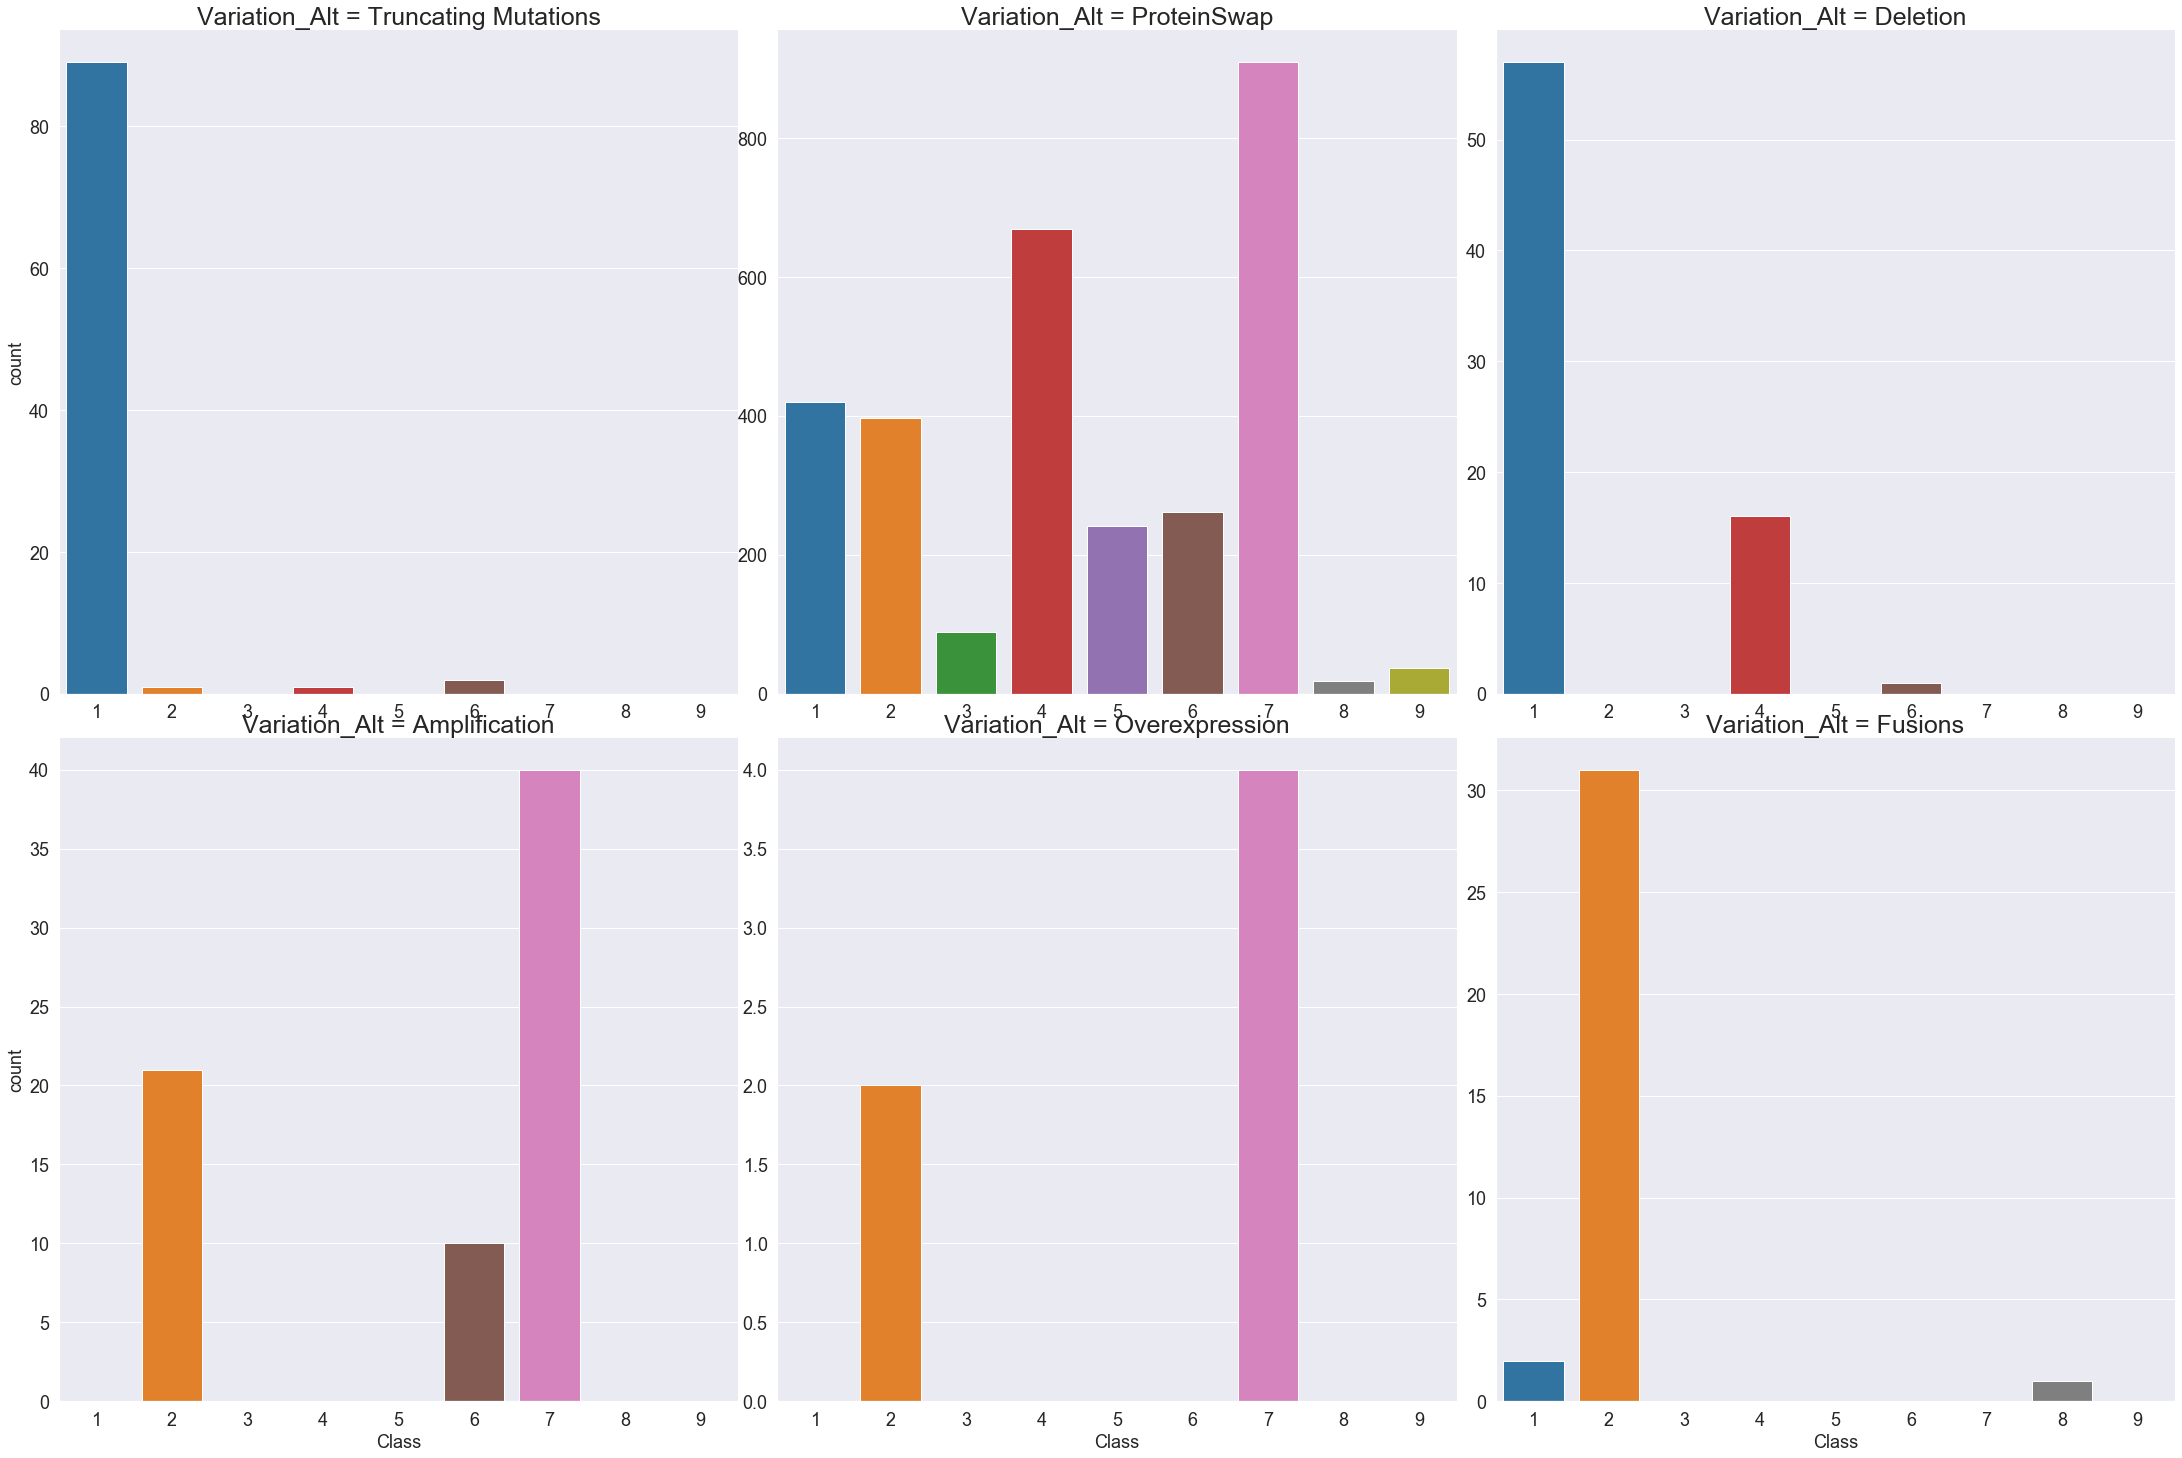

In [36]:
g = sns.catplot(x='Class',data=train_variants_df[['Variation_Alt','Class']],col='Variation_Alt',kind='count',col_wrap=3,
           height = 10,sharey=False,sharex=False)
g.set_yticklabels(size = 18)
g.set_xticklabels(size = 18)
g.set_ylabels(size = 18)
g.set_xlabels(size = 18)
g.set_titles(size = 25)

plt.show()

Seems like the variation type also has some predictive power!

# Interim Summary
Based on their distributions, these variables seem to have some predictive power for the class which a mutation belongs:
* Variation type
* Gene that was mutated

Some other interesting things we saw:
* Seems like some genes are much more prone to mutation than others
* Some classes occur more often than others


## Now let's take a look at the text data

In [ ]:
# add information about word count and character count
train_text_df["num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()) )
train_text_df["num_chars"] = train_text_df["Text"].apply(lambda x: len(str(x)) )

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(train_text_df.num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

In [ ]:
train_text_df.num_words.describe()

While it is interesting that some mutations have a longer text description than others, intuition tells me what it wouldn't make sense for the description length to have predictive power. Notice that the mean word count is 1; let's check if there are any entries with empty text descriptors.

In [ ]:
train_text_df[train_text_df["num_words"]<5]

This will give us trouble -  let's remove these entries. But first, we should combine the text dataframe with the variants dataframe.

## Combine text data w/ variation data

In [ ]:
# first merge dataframes
train_df = train_variants_df.merge(train_text_df, how='inner', left_on='ID', right_on='ID')

In [ ]:
train_df[train_df["num_words"]<500]

In [ ]:
# remove rows with NaN
train_df = train_df[train_df['Text'].notna()]
train_df[train_df["num_words"]<500]

Some variations have the same text descriptor, and belong to the same class. Some variations have the same text descriptor, but belongs to a separate class (see IDs [140,145,259], and [2906,2908]). This will definitely give us trouble later on..

# Clean text data

In [ ]:
import string
import re #regular expressions
from nltk.corpus import stopwords
# note: to use stopwords, first do nltk.download() to download the various corpi in nltk.

# TO DO:
# we should remove the references from the text field!! e.g., if there are references like (1,2) or [5][6]
# use regex expression to clean these up!

def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def cleanup(text):
    text = textClean(text)
    text= text.translate(str.maketrans("","", string.punctuation))
    return text

In [ ]:
allText = train_df['Text'].apply(cleanup)

In [ ]:
# before
train_df['Text'][0][1500:2500]

In [ ]:
# after
allText[0][1500:2500]

In [ ]:
from gensim.models.doc2vec import LabeledSentence
from gensim import utils

def constructLabeledSentences(data):
    sentences=[]
    for index, row in data.iteritems():
        sentences.append(LabeledSentence(utils.to_unicode(row).split(), ['Text' + '_%s' % str(index)]))
    return sentences

In [ ]:
sentences = constructLabeledSentences(allText)

# Text ->  Feature/Vector

In [ ]:
from gensim.models import Doc2Vec

Text_INPUT_DIM=300
filename='docEmbeddings_5_clean.d2v'

if os.path.isfile(filename):
    text_model = Doc2Vec.load(filename)
else:
    text_model = Doc2Vec(min_count=1, window=5, size=Text_INPUT_DIM, sample=1e-4, negative=5, workers=4, iter=5,seed=1)
    text_model.build_vocab(sentences)
    text_model.train(sentences, total_examples=text_model.corpus_count, epochs=text_model.iter)
    text_model.save(filename)

In [ ]:
text_model

In [ ]:
train_size = len(train_df)
test_size = len(test_variants_df)
text_train_arrays = np.zeros((train_size, Text_INPUT_DIM))
text_test_arrays = np.zeros((test_size, Text_INPUT_DIM))


for i in range(train_size):
    text_train_arrays[i] = text_model.docvecs['Text_'+str(i)]

j=0
for i in range(train_size,train_size+test_size):
    text_test_arrays[j] = text_model.docvecs['Text_'+str(i)]
    j=j+1
    
print(text_train_arrays[0][:50])


# Classify data!
https://keras.io/examples/nlp/text_classification_with_transformer/